## https://medium.com/@numanyilmaz61/handling-missing-data-93d3ce5d0161


## Missing Value Check Package
* missingno
* pandas_profiling

## Missing Value 처리
* fancyimpute [작동은 못시킴]


In [51]:
import warnings 
warnings.filterwarnings('ignore')
# Import libraries and check the versions
import pandas as pd
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
from fancyimpute import KNN
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)


Python version 3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
Numpy version 1.15.4
Pandas version 0.23.4
Matplotlib version 3.0.2
Missingno version 0.4.1


In [45]:
data = {'name': ['Michael', 'Jessica', 'Sue', 'Jake', 'Amy', 'Tye'],
        'gender':[None,'F',np.NaN,'F',np.NaN, 'M'],
        'height': [123, 145, 100 , np.NaN, None, 150],
        'weight': [10, np.NaN , 30, np.NaN, None, 20],
        'age': [14, None, 29 , np.NaN, 52, 45],
        }
df = pd.DataFrame(data, columns = ['name','gender', 'height', 'weight', 'age'])
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


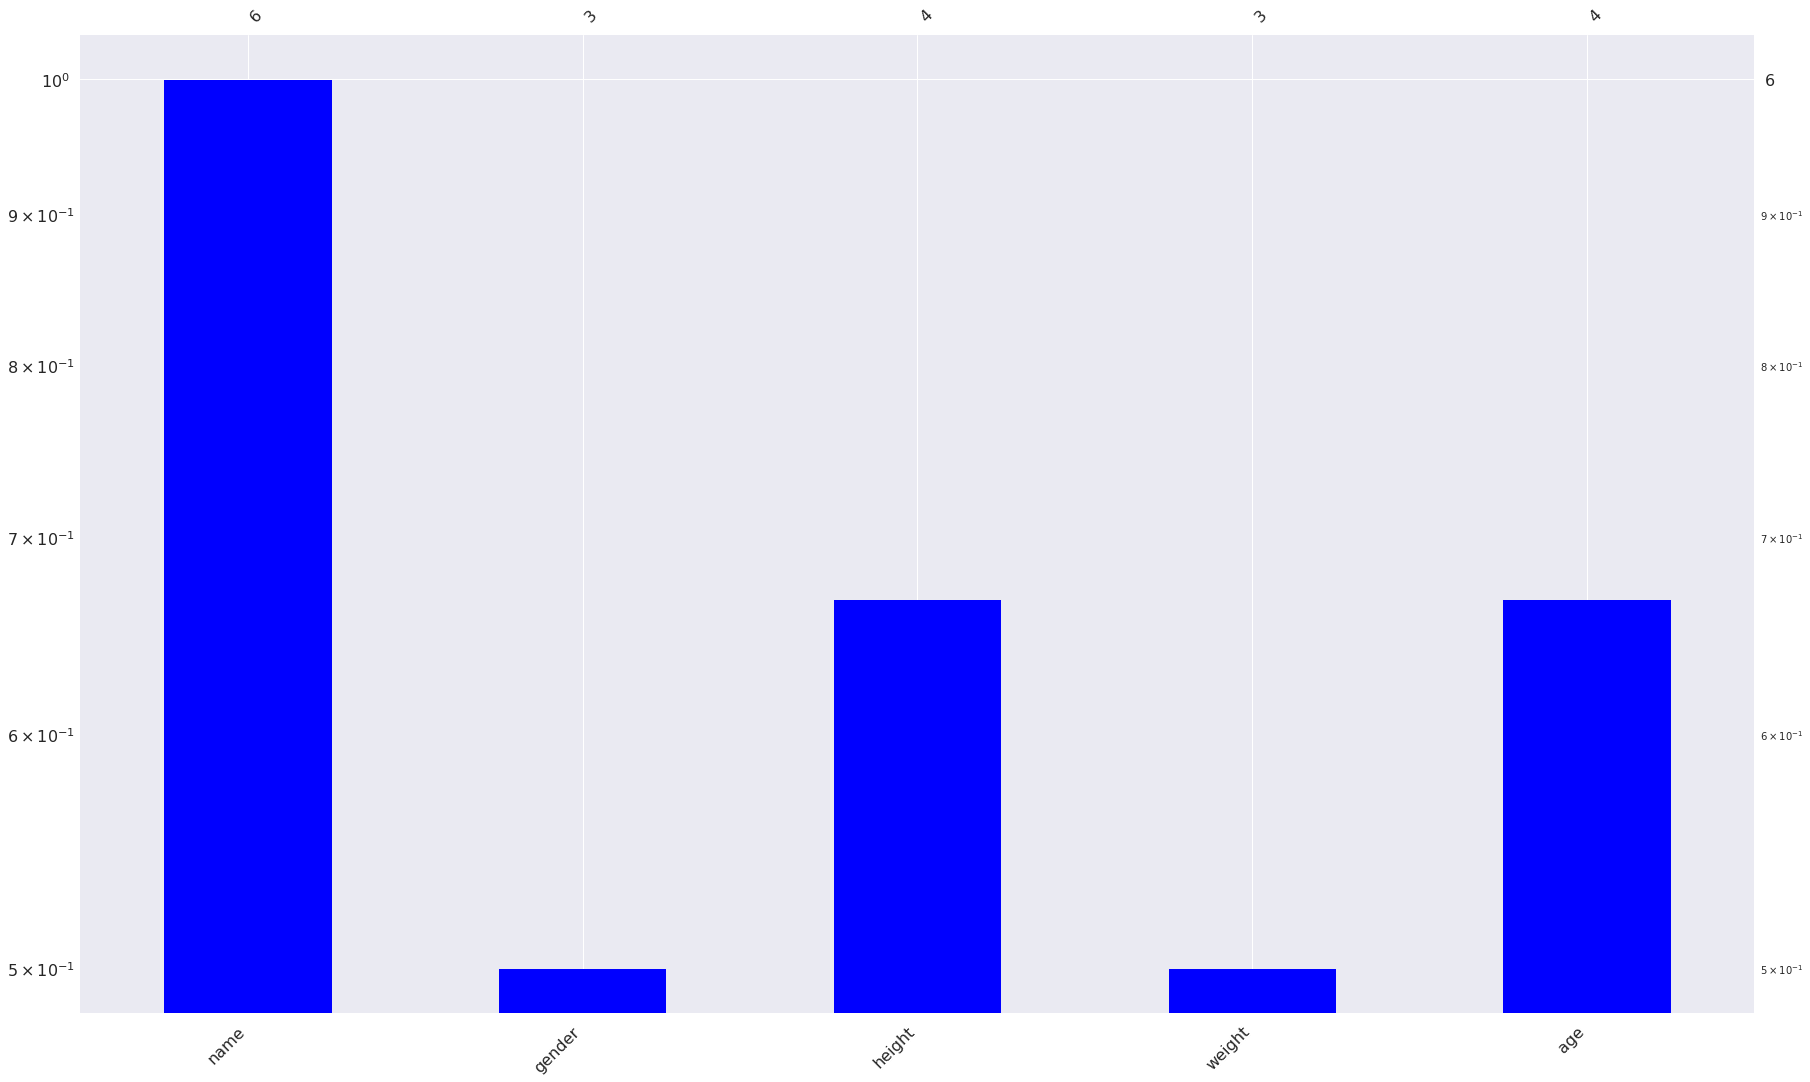

In [46]:
msno.bar(df, color="blue", log=True, figsize=(30,18))

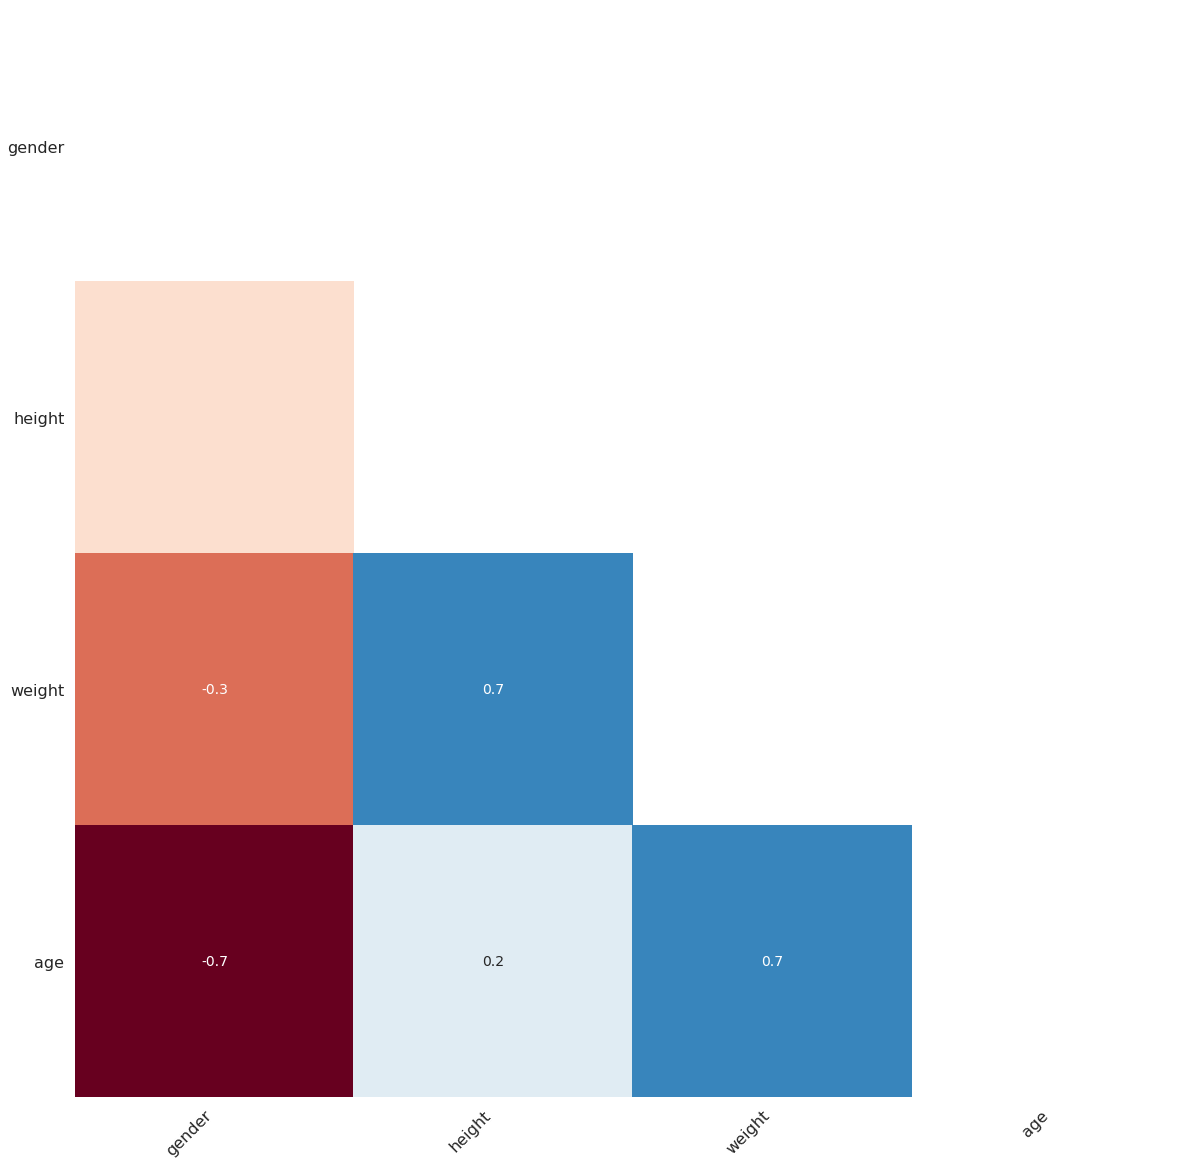

In [47]:
msno.heatmap( df , figsize=(20,20))

## How can we detect missing values?
### 1- .info(), isnull() and notnull() are useful in detecting missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
name      6 non-null object
gender    3 non-null object
height    4 non-null float64
weight    3 non-null float64
age       4 non-null float64
dtypes: float64(3), object(2)
memory usage: 320.0+ bytes


In [8]:
df.isnull().sum()

name      0
gender    3
height    2
weight    3
age       2
dtype: int64

In [9]:
df.notnull().sum()

name      6
gender    3
height    4
weight    3
age       4
dtype: int64

## Missingno
* 시각화를 통해 데이터 Nan 체크
* 하얀색이 missing

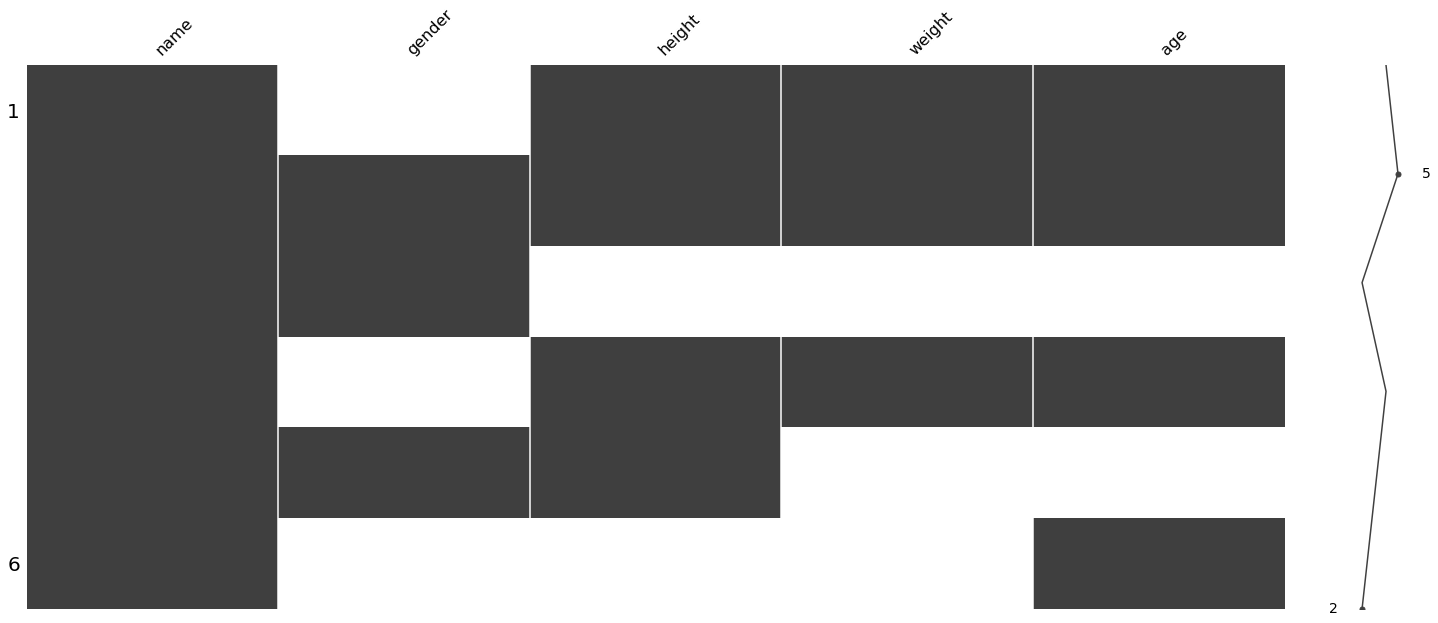

In [10]:
msno.matrix(df.sample(6))

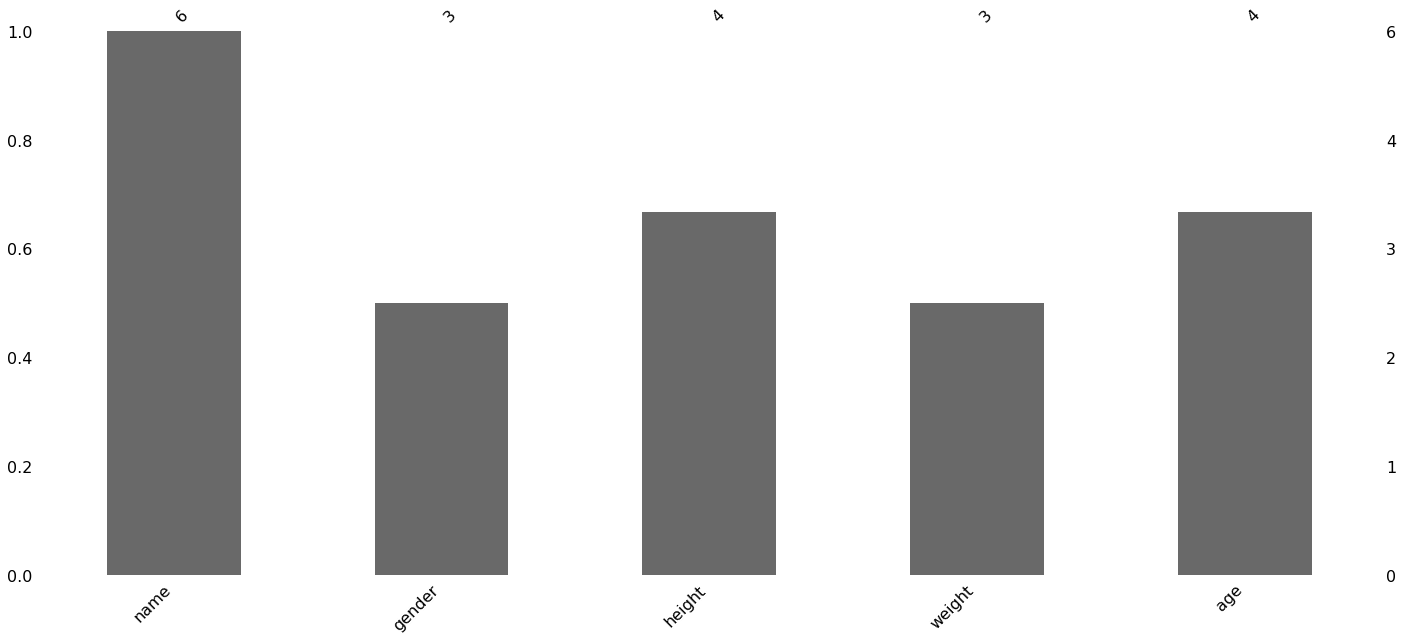

In [11]:
msno.bar(df.sample(6))

## pandas_profiling 
* 같이 찾게 된 패키지 
* missing value 찾기에 좋은 패키지!!

In [12]:
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,6
Total Missing (%),33.3%
Total size in memory,320.0 B
Average record size in memory,53.3 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


# 어떻게 Missing Value 처리 할까

In [17]:
df['gender']

0    None
1       F
2     NaN
3       F
4     NaN
5       M
Name: gender, dtype: object

In [15]:
df.dropna()
df.dropna(axis = 1)
df['age'].fillna(0)
## ffill 앞앞컬럼을 가져온다.
df['gender'].fillna(method='ffill')

0    None
1       F
2       F
3       F
4       F
5       M
Name: gender, dtype: object

In [18]:
# ffill 은 한계가 있어서 극복하는 방벙이 back fill 
df['gender'].fillna(method='bfill')

0    F
1    F
2    F
3    F
4    M
5    M
Name: gender, dtype: object

In [27]:
df['height'].fillna(df.groupby('gender')['height'].transform('mean'),inplace= True)
df['height']

0    123.000000
1    145.000000
2    100.000000
3    122.666667
4    150.000000
5    150.000000
Name: height, dtype: float64

In [29]:
df['weight'].fillna(df['weight'].median(), inplace=True)
df['weight']

0    10.0
1    20.0
2    30.0
3    20.0
4    20.0
5    20.0
Name: weight, dtype: float64

In [ ]:
df['age']

In [33]:
df['age'].interpolate(inplace=True)
df['age']

0    14.0
1    21.5
2    29.0
3    40.5
4    52.0
5    45.0
Name: age, dtype: float64